# 线性代数

`numpy` 和 `scipy` 中，负责进行线性代数部分计算的模块叫做 `linalg`。

In [1]:
import numpy as np
import numpy.linalg
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

## numpy.linalg VS scipy.linalg

一方面`scipy.linalg` 包含 `numpy.linalg` 中的所有函数，同时还包含了很多 `numpy.linalg` 中没有的函数。

另一方面，`scipy.linalg` 能够保证这些函数使用 BLAS/LAPACK 加速，而 `numpy.linalg` 中这些加速是可选的。

因此，在使用时，我们一般使用 `scipy.linalg` 而不是 `numpy.linalg`。

我们可以简单看看两个模块的差异：

In [2]:
print "number of items in numpy.linalg:", len(dir(numpy.linalg))
print "number of items in scipy.linalg:", len(dir(scipy.linalg))

number of items in numpy.linalg: 36
number of items in scipy.linalg: 115


## numpy.matrix VS 2D numpy.ndarray

线性代数的基本操作对象是矩阵，而矩阵的表示方法主要有两种：`numpy.matrix` 和 2D `numpy.ndarray`。

### numpy.matrix

`numpy.matrix` 是一个矩阵类，提供了一些方便的矩阵操作：
- 支持类似 `MATLAB` 创建矩阵的语法
- 矩阵乘法默认用 `*` 号
- `.I` 表示逆，`.T` 表示转置

可以用 `mat` 或者 `matrix` 来产生矩阵：

In [3]:
A = np.mat("[1, 2; 3, 4]")
print repr(A)

A = np.matrix("[1, 2; 3, 4]")
print repr(A)

matrix([[1, 2],
        [3, 4]])
matrix([[1, 2],
        [3, 4]])


转置和逆：

In [4]:
print repr(A.I)
print repr(A.T)

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])
matrix([[1, 3],
        [2, 4]])


矩阵乘法：

In [5]:
b = np.mat('[5; 6]')
print repr(A * b)

matrix([[17],
        [39]])


### 2 维 numpy.ndarray

虽然 `numpy.matrix` 有着上面的好处，但是一般不建议使用，而是用 2 维 `numpy.ndarray` 对象替代，这样可以避免一些不必要的困惑。

我们可以使用 `array` 复现上面的操作：

In [6]:
A = np.array([[1,2], [3,4]])
print repr(A)

array([[1, 2],
       [3, 4]])


逆和转置：

In [7]:
print repr(linalg.inv(A))
print repr(A.T)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])
array([[1, 3],
       [2, 4]])


矩阵乘法：

In [8]:
b = np.array([5, 6])

print repr(A.dot(b))

array([17, 39])


普通乘法：

In [9]:
print repr(A * b)

array([[ 5, 12],
       [15, 24]])


`scipy.linalg` 的操作可以作用到两种类型的对象上，没有区别。

## 基本操作

### 求逆

矩阵 $\mathbf{A}$ 的逆 $\mathbf{B}$ 满足：$\mathbf{BA}=\mathbf{AB}=I$，记作 $\mathbf{B} = \mathbf{A}^{-1}$。

事实上，我们已经见过求逆的操作，`linalg.inv` 可以求一个可逆矩阵的逆：

In [10]:
A = np.array([[1,2],[3,4]])

print linalg.inv(A)

print A.dot(scipy.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[  1.00000000e+00   0.00000000e+00]
 [  8.88178420e-16   1.00000000e+00]]


### 求解线性方程组

例如，下列方程组
$$
\begin{eqnarray*} 
x + 3y + 5z & = & 10 \\
2x + 5y + z & = & 8  \\
2x + 3y + 8z & = & 3
\end{eqnarray*}
$$
的解为：
$$
\begin{split}\left[\begin{array}{c} x\\ y\\ z\end{array}\right]=\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]^{-1}\left[\begin{array}{c} 10\\ 8\\ 3\end{array}\right]=\frac{1}{25}\left[\begin{array}{c} -232\\ 129\\ 19\end{array}\right]=\left[\begin{array}{c} -9.28\\ 5.16\\ 0.76\end{array}\right].\end{split}
$$

我们可以使用 `linalg.solve` 求解方程组，也可以先求逆再相乘，两者中 `solve` 比较快。

In [11]:
import time

A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])
b = np.array([10, 8, 3])

tic = time.time()

for i in xrange(1000):
    x = linalg.inv(A).dot(b)

print x
print A.dot(x)-b
print "inv and dot: {} s".format(time.time() - tic)

tic = time.time()

for i in xrange(1000):
    x = linalg.solve(A, b)

print x
print A.dot(x)-b
print "solve: {} s".format(time.time() - tic)

[-9.28  5.16  0.76]
[  0.00000000e+00  -1.77635684e-15  -8.88178420e-16]
inv and dot: 0.0353579521179 s
[-9.28  5.16  0.76]
[  0.00000000e+00  -1.77635684e-15  -1.77635684e-15]
solve: 0.0284671783447 s


### 计算行列式

方阵的行列式为
$$
\left|\mathbf{A}\right|=\sum_{j}\left(-1\right)^{i+j}a_{ij}M_{ij}.
$$

其中 $a_{ij}$ 表示 $\mathbf{A}$ 的第 $i$ 行 第 $j$ 列的元素，$M_{ij}$ 表示矩阵 $\mathbf{A}$ 去掉第 $i$ 行 第 $j$ 列的新矩阵的行列式。

例如，矩阵
$$
\begin{split}\mathbf{A=}\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]\end{split}
$$
的行列式是：
$$
\begin{eqnarray*} \left|\mathbf{A}\right| & = & 1\left|\begin{array}{cc} 5 & 1\\ 3 & 8\end{array}\right|-3\left|\begin{array}{cc} 2 & 1\\ 2 & 8\end{array}\right|+5\left|\begin{array}{cc} 2 & 5\\ 2 & 3\end{array}\right|\\  & = & 1\left(5\cdot8-3\cdot1\right)-3\left(2\cdot8-2\cdot1\right)+5\left(2\cdot3-2\cdot5\right)=-25.\end{eqnarray*}
$$

可以用 `linalg.det` 计算行列式：

In [12]:
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

print linalg.det(A)

-25.0


### 计算矩阵或向量的模

矩阵的模定义如下：
$$
\begin{split}\left\Vert \mathbf{A}\right\Vert =\left\{ \begin{array}{cc} \max_{i}\sum_{j}\left|a_{ij}\right| & \textrm{ord}=\textrm{inf}\\ \min_{i}\sum_{j}\left|a_{ij}\right| & \textrm{ord}=-\textrm{inf}\\ \max_{j}\sum_{i}\left|a_{ij}\right| & \textrm{ord}=1\\ \min_{j}\sum_{i}\left|a_{ij}\right| & \textrm{ord}=-1\\ \max\sigma_{i} & \textrm{ord}=2\\ \min\sigma_{i} & \textrm{ord}=-2\\ \sqrt{\textrm{trace}\left(\mathbf{A}^{H}\mathbf{A}\right)} & \textrm{ord}=\textrm{'fro'}\end{array}\right.\end{split}
$$
其中，$\sigma_i$ 是矩阵的奇异值。

向量的模定义如下：
$$
\begin{split}\left\Vert \mathbf{x}\right\Vert =\left\{ \begin{array}{cc} \max\left|x_{i}\right| & \textrm{ord}=\textrm{inf}\\ \min\left|x_{i}\right| & \textrm{ord}=-\textrm{inf}\\ \left(\sum_{i}\left|x_{i}\right|^{\textrm{ord}}\right)^{1/\textrm{ord}} & \left|\textrm{ord}\right|<\infty.\end{array}\right.\end{split}
$$

`linalg.norm` 可以计算向量或者矩阵的模：

In [13]:
A = np.array([[1, 2],
              [3, 4]])

print linalg.norm(A)

print linalg.norm(A,'fro') # frobenius norm 默认值

print linalg.norm(A,1) # L1 norm 最大列和

print linalg.norm(A,-1) # L -1 norm 最小列和

print linalg.norm(A,np.inf) # L inf norm 最大行和

5.47722557505
5.47722557505
6
4
7


### 最小二乘解和伪逆

#### 问题描述

所谓最小二乘问题的定义如下：

假设 $y_i$ 与 $\mathbf{x_i}$ 的关系可以用一组系数 $c_j$ 和对应的模型函数 $f_j(\mathbf{x_i})$ 的模型表示：

$$
y_{i}=\sum_{j}c_{j}f_{j}\left(\mathbf{x}_{i}\right)+\epsilon_{i}
$$

其中 $\epsilon_i$ 表示数据的不确定性。最小二乘就是要优化这样一个关于 $c_j$ 的问题：
$$
J\left(\mathbf{c}\right)=\sum_{i}\left|y_{i}-\sum_{j}c_{j}f_{j}\left(x_{i}\right)\right|^{2}
$$

其理论解满足：
$$
\frac{\partial J}{\partial c_{n}^{*}}=0=\sum_{i}\left(y_{i}-\sum_{j}c_{j}f_{j}\left(x_{i}\right)\right)\left(-f_{n}^{*}\left(x_{i}\right)\right)
$$

改写为：
$$
\begin{eqnarray*} \sum_{j}c_{j}\sum_{i}f_{j}\left(x_{i}\right)f_{n}^{*}\left(x_{i}\right) & = & \sum_{i}y_{i}f_{n}^{*}\left(x_{i}\right)\\ \mathbf{A}^{H}\mathbf{Ac} & = & \mathbf{A}^{H}\mathbf{y}\end{eqnarray*}
$$

其中：
$$
\left\{ \mathbf{A}\right\} _{ij}=f_{j}\left(x_{i}\right).
$$

当 $\mathbf{A^HA}$ 可逆时，我们有：
$$
\mathbf{c}=\left(\mathbf{A}^{H}\mathbf{A}\right)^{-1}\mathbf{A}^{H}\mathbf{y}=\mathbf{A}^{\dagger}\mathbf{y}
$$

矩阵 $\mathbf{A}^{\dagger}$ 叫做 $\mathbf{A}$ 的伪逆。

#### 问题求解

注意到，我们的模型可以写为：
$$
\mathbf{y}=\mathbf{Ac}+\boldsymbol{\epsilon}.
$$

在给定 $\mathbf{y}$ 和 $\mathbf{A}$ 的情况下，我们可以使用 `linalg.lstsq` 求解 $\mathbf c$。

在给定 $\mathbf{A}$ 的情况下，我们可以使用 `linalg.pinv` 或者 `linalg.pinv2` 求解 $\mathbf{A}^{\dagger}$。

####  例子

假设我们的数据满足：
$$
\begin{align}
y_{i} & =c_{1}e^{-x_{i}}+c_{2}x_{i} \\
z_{i} & = y_i + \epsilon_i
\end{align}
$$

其中 $x_i = \frac{i}{10},\ i = 1,\dots,10$，$c_1 = 5, c_2 = 2$，产生数据

In [14]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

构造矩阵 $\mathbf A$：

In [15]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
print A

[[ 0.90483742  0.1       ]
 [ 0.81873075  0.2       ]
 [ 0.74081822  0.3       ]
 [ 0.67032005  0.4       ]
 [ 0.60653066  0.5       ]
 [ 0.54881164  0.6       ]
 [ 0.4965853   0.7       ]
 [ 0.44932896  0.8       ]
 [ 0.40656966  0.9       ]
 [ 0.36787944  1.        ]]


求解最小二乘问题：

In [16]:
c, resid, rank, sigma = linalg.lstsq(A, zi)

print c

[ 4.87016856  2.19081311]


其中 `c` 的形状与 `zi` 一致，为最小二乘解，`resid` 为 `zi - A c` 每一列差值的二范数，`rank` 为矩阵 `A` 的秩，`sigma` 为矩阵 `A` 的奇异值。

查看拟合效果：

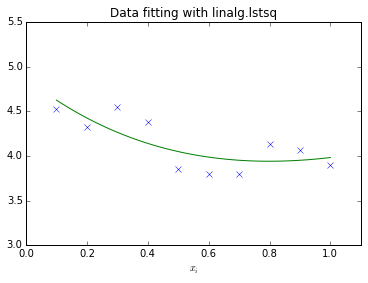

In [17]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

### 广义逆

`linalg.pinv` 或 `linalg.pinv2` 可以用来求广义逆，其区别在于前者使用求最小二乘解的算法，后者使用求奇异值的算法求解。

## 矩阵分解

### 特征值和特征向量

#### 问题描述

对于给定的 $N \times N$ 矩阵 $\mathbf A$，特征值和特征向量问题相当与寻找标量 $\lambda$ 和对应的向量 $\mathbf v$ 使得：
$$
\mathbf{Av} = \lambda \mathbf{v}
$$

矩阵的 $N$ 个特征值（可能相同）可以通过计算特征方程的根得到：
$$
\left|\mathbf{A} - \lambda \mathbf{I}\right| = 0
$$

然后利用这些特征值求（归一化的）特征向量。

#### 问题求解

- `linalg.eig(A)` 
    - 返回矩阵的特征值与特征向量
- `linalg.eigvals(A)`
    - 返回矩阵的特征值
- `linalg.eig(A, B)`
    - 求解 $\mathbf{Av} = \lambda\mathbf{Bv}$ 的问题

#### 例子

矩阵为
$$
\begin{split}\mathbf{A}=\left[\begin{array}{ccc} 1 & 5 & 2\\ 2 & 4 & 1\\ 3 & 6 & 2\end{array}\right].\end{split}
$$

特征多项式为：
$$
\begin{eqnarray*} \left|\mathbf{A}-\lambda\mathbf{I}\right| & = & \left(1-\lambda\right)\left[\left(4-\lambda\right)\left(2-\lambda\right)-6\right]-\\  &  & 5\left[2\left(2-\lambda\right)-3\right]+2\left[12-3\left(4-\lambda\right)\right]\\  & = & -\lambda^{3}+7\lambda^{2}+8\lambda-3.\end{eqnarray*}
$$

特征根为：
$$
\begin{eqnarray*} \lambda_{1} & = & 7.9579\\ \lambda_{2} & = & -1.2577\\ \lambda_{3} & = & 0.2997.\end{eqnarray*}
$$

In [18]:
A = np.array([[1, 5, 2], 
              [2, 4, 1],
              [3, 6, 2]])

la, v = linalg.eig(A)

print la


# 验证是否归一化
print np.sum(abs(v**2),axis=0)

# 第一个特征值
l1 = la[0]
# 对应的特征向量
v1 = v[:, 0].T

# 验证是否为特征值和特征向量对
print linalg.norm(A.dot(v1)-l1*v1)

[ 7.95791620+0.j -1.25766471+0.j  0.29974850+0.j]
[ 1.  1.  1.]
3.23301824835e-15


### 奇异值分解

#### 问题描述

$M \times N$ 矩阵 $\mathbf A$ 的奇异值分解为：
$$
\mathbf{A=U}\boldsymbol{\Sigma}\mathbf{V}^{H}
$$

其中 $\boldsymbol{\Sigma}, (M \times N)$ 只有对角线上的元素不为 0，$\mathbf U, (M \times M)$ 和 $\mathbf V, (N \times N)$ 为正交矩阵。

其具体原理可以查看维基百科：
https://en.wikipedia.org/wiki/Singular_value_decomposition

#### 问题求解

- `U,s,Vh = linalg.svd(A)` 
    - 返回 $U$ 矩阵，奇异值 $s$，$V^H$ 矩阵
- `Sig = linalg.diagsvd(s,M,N)`
    - 从奇异值恢复 $\boldsymbol{\Sigma}$ 矩阵

#### 例子

奇异值分解：

In [19]:
A = np.array([[1,2,3],[4,5,6]])

U, s, Vh = linalg.svd(A)

$\boldsymbol{\Sigma}$ 矩阵：

In [20]:
M, N = A.shape
Sig = linalg.diagsvd(s,M,N)

print Sig

[[ 9.508032    0.          0.        ]
 [ 0.          0.77286964  0.        ]]


检查正确性：

In [21]:
print A
print U.dot(Sig.dot(Vh))

[[1 2 3]
 [4 5 6]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


### LU 分解

$M \times N$ 矩阵 $\mathbf A$ 的 `LU` 分解为：
$$
\mathbf{A}=\mathbf{P}\,\mathbf{L}\,\mathbf{U}
$$

$\mathbf P$ 是 $M \times M$ 的单位矩阵的一个排列，$\mathbf L$ 是下三角阵，$\mathbf U$ 是上三角阵。 

可以使用 `linalg.lu` 进行 LU 分解的求解：

具体原理可以查看维基百科：
https://en.wikipedia.org/wiki/LU_decomposition

In [22]:
A = np.array([[1,2,3],[4,5,6]])

P, L, U = linalg.lu(A)

print P
print L
print U

print P.dot(L).dot(U)

[[ 0.  1.]
 [ 1.  0.]]
[[ 1.    0.  ]
 [ 0.25  1.  ]]
[[ 4.    5.    6.  ]
 [ 0.    0.75  1.5 ]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


### Cholesky 分解

`Cholesky` 分解是一种特殊的 `LU` 分解，此时要求 $\mathbf A$ 为 Hermitian 正定矩阵 （$\mathbf A = \mathbf{A^H}$）。

此时有：
$$
\begin{eqnarray*} \mathbf{A} & = & \mathbf{U}^{H}\mathbf{U}\\ \mathbf{A} & = & \mathbf{L}\mathbf{L}^{H}\end{eqnarray*}
$$
即
$$
\mathbf{L}=\mathbf{U}^{H}.
$$

可以用 `linalg.cholesky` 求解。

### QR 分解

$M×N$ 矩阵 $\mathbf A$ 的 `QR` 分解为：
$$
\mathbf{A=QR}
$$

$\mathbf R$ 为上三角形矩阵，$\mathbf Q$ 是正交矩阵。

维基链接：
https://en.wikipedia.org/wiki/QR_decomposition

可以用 `linalg.qr` 求解。

### Schur 分解

对于 $N\times N$ 方阵 $\mathbf A$, `Schur` 分解要求找到满足下式的矩阵：
$$
\mathbf{A=ZTZ^H}
$$

其中 $\mathbf Z$ 是正交矩阵，$\mathbf T$ 是一个上三角矩阵。

维基链接：
https://en.wikipedia.org/wiki/Schur_decomposition

In [23]:
A = np.mat('[1 3 2; 1 4 5; 2 3 6]')

print A

T, Z = linalg.schur(A)

print T, Z

print Z.dot(T).dot(Z.T)

[[1 3 2]
 [1 4 5]
 [2 3 6]]
[[ 9.90012467  1.78947961 -0.65498528]
 [ 0.          0.54993766 -1.57754789]
 [ 0.          0.51260928  0.54993766]] [[ 0.36702395 -0.85002495 -0.37782404]
 [ 0.63681656 -0.06646488  0.76814522]
 [ 0.67805463  0.52253231 -0.51691576]]
[[ 1.  3.  2.]
 [ 1.  4.  5.]
 [ 2.  3.  6.]]


## 矩阵函数

考虑函数 $f(x)$ 的泰勒展开：
$$
f\left(x\right)=\sum_{k=0}^{\infty}\frac{f^{\left(k\right)}\left(0\right)}{k!}x^{k}
$$

对于方阵，矩阵函数可以定义如下：
$$
f\left(\mathbf{A}\right)=\sum_{k=0}^{\infty}\frac{f^{\left(k\right)}\left(0\right)}{k!}\mathbf{A}^{k}
$$

这也是计算矩阵函数的最好的方式。

### 指数和对数函数

#### 指数

指数可以定义如下：
$$
e^{\mathbf{A}}=\sum_{k=0}^{\infty}\frac{1}{k!}\mathbf{A}^{k}
$$

`linalg.expm3` 使用的是泰勒展开的方法计算结果：

In [24]:
A = np.array([[1, 2], [3, 4]])

print linalg.expm3(A)

[[  51.96890355   74.73648784]
 [ 112.10473176  164.07363531]]


另一种方法先计算 A 的特征值分解：
$$
\mathbf{A}=\mathbf{V}\boldsymbol{\Lambda}\mathbf{V}^{-1}
$$

然后有（正交矩阵和对角阵的性质）：
$$
e^{\mathbf{A}}=\mathbf{V}e^{\boldsymbol{\Lambda}}\mathbf{V}^{-1}
$$

`linalg.expm2` 使用的就是这种方法：

In [25]:
print linalg.expm2(A)

[[  51.9689562    74.73656457]
 [ 112.10484685  164.07380305]]


最优的方法是用 [`Padé` 近似](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant) 实现，`Padé` 近似往往比截断的泰勒级数准确，而且当泰勒级数不收敛时，`Padé` 近似往往仍可行，所以多用于在计算机数学中。

`linalg.expm` 使用的就是这种方法：

In [26]:
print linalg.expm(A)

[[  51.9689562    74.73656457]
 [ 112.10484685  164.07380305]]


#### 对数

指数的逆运算，可以用 `linalg.logm` 实现：

In [27]:
print A
print linalg.logm(linalg.expm(A))

[[1 2]
 [3 4]]
[[ 1.  2.]
 [ 3.  4.]]


### 三角函数

根据欧拉公式，其定义为：
$$
\begin{eqnarray*} \sin\left(\mathbf{A}\right) & = & \frac{e^{j\mathbf{A}}-e^{-j\mathbf{A}}}{2j}\\ \cos\left(\mathbf{A}\right) & = & \frac{e^{j\mathbf{A}}+e^{-j\mathbf{A}}}{2}.\end{eqnarray*}
$$

正切函数定义为：
$$
\tan\left(x\right)=\frac{\sin\left(x\right)}{\cos\left(x\right)}=\left[\cos\left(x\right)\right]^{-1}\sin\left(x\right)
$$

因此矩阵的正切函数定义为：
$$
\left[\cos\left(\mathbf{A}\right)\right]^{-1}\sin\left(\mathbf{A}\right).
$$

具体实现：
- `linalg.sinm`
- `linalg.cosm`
- `linalg.tanm`

### 双曲三角函数

\begin{eqnarray*} \sinh\left(\mathbf{A}\right) & = & \frac{e^{\mathbf{A}}-e^{-\mathbf{A}}}{2}\\ \cosh\left(\mathbf{A}\right) & = & \frac{e^{\mathbf{A}}+e^{-\mathbf{A}}}{2}\\ \tanh\left(\mathbf{A}\right) & = & \left[\cosh\left(\mathbf{A}\right)\right]^{-1}\sinh\left(\mathbf{A}\right).\end{eqnarray*}

具体实现：
- `linalg.sinhm`
- `linalg.coshm`
- `linalg.tanhm`

## 特殊矩阵

`Scipy` 提供了一些特殊矩阵的实现，具体可以参考：

http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#special-matrices